## Setup and login
- Define the database backend. Local json files is the default.
- Inititize FetchJson
- login, Make sure to have a config.ini configured

In [1]:
from zpdatareader import FetchJson
from ZFileDb import ZFileDb

# Define the database
db = ZFileDb(db_path="database/ZFileDb")
z = FetchJson(db=db)
z.login()

## Get event result and plot
- All API reusts are cached into local TinyDB database by default.
- The api data is not proccessed.
- If multiple APIs are present they are combined

In [7]:
result, status = z.fetch_result(zid=2552316)
print(f"Cache or refresh: {status}")
print(f"Event ID, 'zid' is: {result['zid']}")
print(f"Top level data in JSON: {result.keys()}")
print("Top five")
for racer in result['zwift_data'][:5]:
    if int(racer['pos']) <=5:
        print(f"{racer['pos']}: {racer['name']} with a time of {racer['race_time'][0]}")

Cache or refresh: cache
Event ID, 'zid' is: 2552316
Top level data in JSON: dict_keys(['zid', 'timestamp', 'view_data', 'zwift_data'])
Top five
1: Seigo. Ito[TKB] with a time of 4894.206
2: Alexander Bojsen [ACR] with a time of 4896.972
3: Nicolas  Rou  with a time of 4897.824
4: Oscar Feldfos with a time of 4898.2
5: Anders Broberg[SZ](UMARA) with a time of 4898.256


##Getting started with analysis
- Tools for this will be added in the future
- Many columns are a list of two values with the second=0 use splitlist()
- Many integer columns have blank "" values that mayb better be 0

In [8]:
import pandas as pd
df = pd.DataFrame(result['zwift_data'])

def splitlist(df, col, drop2=True):
    df[[f'{col}', f'{col}_2' ]] = df[col].tolist()
    if drop2:
        df.drop(f'{col}_2', axis=1, inplace=True)

splitlist(df, 'watts')
splitlist(df, 'wkg')
splitlist(df, 'wkg_ftp')

df.head()

,DT_RowId,name,watts,wkg,bpm,hrm,race_time,time_diff,zwid,label,dq_cat,pos,power_type,wkg_ftp,wkg1200,lagp,events
0,270093,Seigo. Ito[TKB],240,4.07,"[131, 0]",1,"[4894.206, 1]",0.000,270093,1,,1,3,4.15,"[0, 0]",,
1,131584,Alexander Bojsen [ACR],300,3.84,"[149, 0]",1,"[4896.972, 0]",2.766,131584,1,,2,3,3.92,"[0, 0]",,
2,845655,Nicolas Rou,288,4.06,"[169, 0]",1,"[4897.824, 0]",3.618,845655,1,,3,3,4.14,"[0, 0]",,
3,2818577,Oscar Feldfos,226,4.01,"[169, 0]",1,"[4898.2, 0]",3.994,2818577,1,,4,3,4.10,"[0, 0]",,
4,407765,Anders Broberg[SZ](UMARA),310,3.88,"[140, 0]",1,"[4898.256, 0]",4.050,407765,1,,5,3,3.96,"[0, 0]",,


In [9]:
df[['watts', 'wkg', 'wkg_ftp']] = df[['watts', 'wkg', 'wkg_ftp']].astype(float)

<AxesSubplot:>

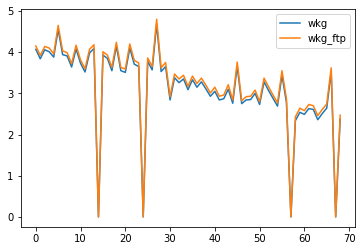

In [10]:
df[['wkg', 'wkg_ftp']].plot()